# Introduction


The data is imported from Kaggle and scrapped from immobilienscout24(apartment rental website). The original data had listings of 268850 apartments throughout Germany. Each apartment is associated with 48 independent variables. For the sake of the project I have  conisdered only 6 independent features(State, Region, City, Living area, Number of rooms and Balcony). 

link to the dataset: https://www.kaggle.com/corrieaar/apartment-rental-offers-in-germany

# Table of Contents

1.Loading the data from csv file.

2.Data visualization of most important features

3.Feature engineering

4.Fitting the model

5.Creating a pickle file

# STEP 1

In [3]:
#importing the libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
data=pd.read_csv(r'F:\Notes\Data Visualization\Housing Germany\House12.csv')

In [5]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
data.tail(10)

,regio1,heatingType,telekomTvOffer,newlyConst,balcony,picturecount,telekomUploadSpeed,scoutId,firingTypes,hasKitchen,geo_bln,cellar,baseRent,livingSpace,geo_krs,street,lift,baseRentRange,typeOfFlat,geo_plz,noRooms,noRoomsRange,garden,livingSpaceRange,regio2,regio3,date
107830,Sachsen,central_heating,ONE_YEAR_FREE,False,1,11,40.0,113220673,gas,True,Sachsen,False,280.00,45.29,Chemnitz,Jahnstra&szlig;e,False,1,NaN,9126,2.0,2,False,2,Chemnitz,Lutherviertel,19-Oct
107831,Hessen,district_heating,NaN,True,1,5,NaN,115365169,district_heating,True,Hessen,True,977.00,76.00,Gießen_Kreis,no_information,True,6,apartment,35398,2.0,2,False,3,Gießen Kreis,Gießen,20-Feb
107832,Nordrhein Westfalen,central_heating,ONE_YEAR_FREE,False,1,11,40.0,104721921,oil,False,Nordrhein_Westfalen,True,565.00,75.00,Wuppertal,no_information,False,4,apartment,42117,3.0,3,True,3,Wuppertal,Elberfeld,19-May
107833,Berlin,NaN,ONE_YEAR_FREE,False,1,8,40.0,113779560,NaN,True,Berlin,True,1200.00,68.00,Berlin,Grainauer Stra&szlig;e,False,7,roof_storey,10777,2.0,2,True,3,Berlin,Wilmersdorf Wilmersdorf,19-Oct
107834,Sachsen Anhalt,central_heating,ONE_YEAR_FREE,False,1,4,40.0,111858492,district_heating,False,Sachsen_Anhalt,True,293.22,66.49,Halle_Saale,Alte Heerstra&szlig;e,False,1,apartment,6132,4.0,4,False,3,Halle Saale,Silberhöhe,20-Feb
107835,Sachsen,NaN,ONE_YEAR_FREE,False,0,2,40.0,111390125,district_heating,False,Sachsen,True,338.01,57.29,Görlitz_Kreis,Am Dreil&auml;ndereck,False,2,apartment,2763,2.5,2,False,2,Görlitz Kreis,Zittau,19-May
107836,Berlin,central_heating,ONE_YEAR_FREE,True,1,12,40.0,110834468,oil,False,Berlin,False,1050.00,79.60,Berlin,Gottschedstr.,False,7,loft,13357,2.0,2,False,3,Berlin,Wedding Wedding,19-May
107837,Sachsen,NaN,ONE_YEAR_FREE,False,1,25,40.0,106820536,NaN,False,Sachsen,True,325.00,65.00,Chemnitz,Erich-M&uuml;hsam-Stra&szlig;e,False,2,NaN,9112,3.0,3,True,3,Chemnitz,Kaßberg,18-Sep
107838,Hessen,district_heating,ONE_YEAR_FREE,False,1,6,40.0,113770960,district_heating,True,Hessen,False,600.00,42.00,Gießen_Kreis,Adolph-Kolping-Stra&szlig;e,True,4,NaN,35392,1.0,1,False,2,Gießen Kreis,Gießen,19-Oct
107839,Sachsen,district_heating,ONE_YEAR_FREE,False,0,5,40.0,109915718,district_heating,False,Sachsen,True,260.00,47.43,Dresden,Sch&auml;ferstra&szlig;e,False,1,NaN,1067,2.0,2,False,2,Dresden,Friedrichstadt,19-May


In [5]:
data.shape

(107840, 27)

In [6]:
#dropping all the unnecessary columns
data.drop(['firingTypes','heatingType','typeOfFlat','telekomUploadSpeed','telekomTvOffer','date','picturecount','scoutId','geo_bln','geo_krs','street','geo_plz','noRooms','baseRentRange','livingSpaceRange'],axis=1,inplace=True)

In [7]:
#splitting the data into 70:30 ratio
train, test = data.iloc[:75488, :], data.iloc[75488:, :]

In [8]:
#limittung the rent between 100 and 10000 thus removing the ouliers
train= train[train.baseRent.between(100,10000, inclusive=True)]

In [9]:
train.isnull().sum().sort_values(ascending=False)

regio3          0
regio2          0
garden          0
noRoomsRange    0
lift            0
livingSpace     0
baseRent        0
cellar          0
hasKitchen      0
balcony         0
newlyConst      0
regio1          0
dtype: int64

# STEP 2 EDA

Text(0, 0.5, 'Count')

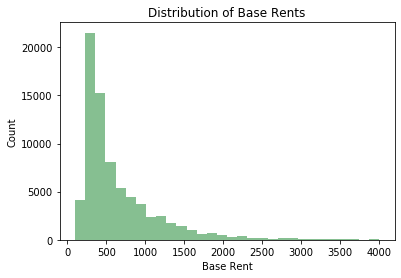

In [7]:
#based on the histogram the base rent is left skewed 
train['baseRent'].hist(bins=30, range=(100,4000),grid=False, color='#86bf91')
plt.title('Distribution of Base Rents')
plt.xlabel('Base Rent')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

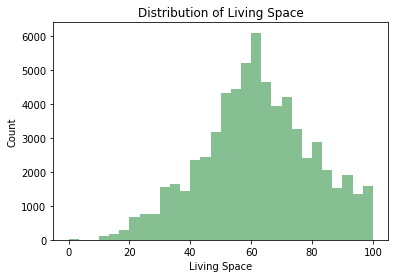

In [8]:
train['livingSpace'].hist(bins=30, range=(0,100),grid=False, color='#86bf91')
plt.title('Distribution of Living Space')
plt.xlabel('Living Space')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

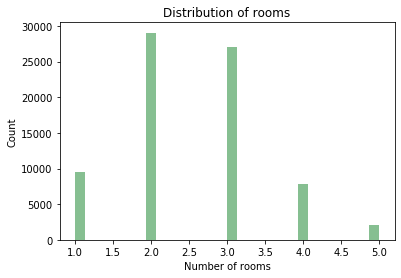

In [9]:
train['noRoomsRange'].hist(bins=30, range=(1,5),grid=False, color='#86bf91')
plt.title('Distribution of rooms')
plt.xlabel('Number of rooms')
plt.ylabel('Count')

In [9]:
train.drop(['garden','lift','cellar','hasKitchen','newlyConst'],axis=1,inplace=True)

In [17]:
#sorting the states by mean base rent
train.groupby(['regio1'])['baseRent'].mean().sort_values(ascending=False)

regio1
Bayern                    1463.610446
Berlin                    1198.540618
Hessen                    1127.793577
Hamburg                   1096.908615
Baden Württemberg         1040.877984
Rheinland Pfalz            746.942777
Schleswig Holstein         672.273167
Bremen                     602.582051
Saarland                   601.873744
Niedersachsen              592.535184
Nordrhein Westfalen        561.109871
Sachsen                    478.155505
Brandenburg                475.464562
Mecklenburg Vorpommern     416.099499
Thüringen                  366.142736
Sachsen Anhalt             350.691038
Name: baseRent, dtype: float64

In [18]:
#sorting the base rent with respect to cities
train.groupby(['regio2'])['baseRent'].mean().sort_values(ascending=False)

regio2
München                                   1794.680508
Frankfurt am Main                         1533.999856
Heidelberg                                1453.890758
Stuttgart                                 1324.943480
München Kreis                             1316.626512
Berlin                                    1198.540618
Hochtaunuskreis                           1176.674821
Böblingen Kreis                           1167.793827
Wiesbaden                                 1148.583929
Köln                                      1146.301266
Main Taunus Kreis                         1107.637078
Düsseldorf                                1106.560957
Rosenheim Kreis                           1101.366667
Hamburg                                   1096.908615
Ludwigsburg Kreis                         1087.988571
Heilbronn Kreis                           1056.484536
Darmstadt                                 1053.552950
Heilbronn                                 1051.069652
Lörrach Kreis        

# STEP 3
Encoding the categorical features by both one hot and label encoding

In [10]:
#label encoding the States and Cities as base rent mostly depends on them
train.replace({"Bayern":15,"Berlin":14,"Hessen":13,"Hamburg":12,"Baden Württemberg":11,"Rheinland Pfalz":10,"Schleswig Holstein":9,"Bremen":8,"Saarland":7,"Niedersachsen":6,"Nordrhein Westfalen":5,"Sachsen":4,"Brandenburg":3,"Mecklenburg Vorpommern":2,"Thüringen":1, "Sachsen Anhalt":0}, inplace = True)

In [11]:
train.replace({'Brandenburg an der Havel':0,'Neubrandenburg':1,'Greifswald':2,'Plauen':3,'Görlitz Kreis':4,'Saalekreis':5,'Mittelsachsen Kreis':6,'Mansfeld Südharz Kreis':7,'Greiz Kreis':8,'Börde Kreis':9,'Zwickau Kreis':10,'Gera':11,'Oberspreewald Lausitz Kreis':12,'Erzgebirgskreis':13,'Burgenlandkreis':14,'Salzlandkreis':15,'Uckermark Kreis':16,'Chemnitz':17,'Altenburger Land Kreis':18,'Nordhausen Kreis':19,'Dessau Roßlau':20,'Anhalt Bitterfeld Kreis':21,'Mecklenburg Strelitz Kreis':22,'Salzgitter':23,'Zwickau':24,'Wilhelmshaven':25,'Harz Kreis':26,'Halle Saale':27,'Stendal Kreis':28,'Nordwestmecklenburg Kreis':29,'Bautzen Kreis':30,'Nordsachsen Kreis':31,'Helmstedt Kreis':32,'Leipzig Kreis':33,'Bremerhaven':34,'Unstrut Hainich Kreis':35,'Gelsenkirchen':36,'Meißen Kreis':37,'Sächsische Schweiz Osterzgebirge Kreis':38,'Magdeburg':39,'Nordvorpommern Kreis':40,'Hagen':41,'Duisburg':42,'Northeim Kreis':43,'Märkischer Kreis':44,'Schwerin':45,'Goslar Kreis':46,'Gotha Kreis':47,'Eisenach':48,'Cottbus':49,'Recklinghausen Kreis':50,'Ludwigslust Kreis':51,'Ennepe Ruhr Kreis':52,'Barnim Kreis':53,'Wuppertal':54,'Kiel':55,'Bochum':56,'Kassel':57,'Essen':58,'Hildesheim Kreis':59,'Erfurt':60,'Schleswig Flensburg Kreis':61,'Darmstadt Dieburg Kreis':62,'Rendsburg Eckernförde Kreis':63,'Neunkirchen Kreis':64,'Stadtverband Saarbrücken Kreis':65,'Krefeld':66,'Mayen Koblenz Kreis':67,'Mönchengladbach':68,'Dortmund':69,'Saarpfalz Kreis':70,'Celle Kreis':71,'Oldenburg Oldenburg':72,'Passau':73,'Trier':74,'Marburg Biedenkopf Kreis':75,'Mettmann Kreis':76,'Leipzig':77,'Flensburg':78,'Gießen Kreis':79,'Herzogtum Lauenburg Kreis':80,'Göttingen Kreis':81,'Rostock':82,'Dresden':83,'Stade Kreis':84,'Aachen':85,'Hannover Kreis':86,'Pinneberg Kreis':87,'Augsburg':88,'Bad Kreuznach Kreis':89,'Erlangen':90,'Saarlouis Kreis':91,'Main Kinzig Kreis':92,'Lüneburg Kreis':93,'Osnabrück':94,'Braunschweig':95,'Nürnberg':96,'Harburg Kreis':97,'Koblenz':98,'Groß Gerau Kreis':99,'Mainz Bingen Kreis':100,'Segeberg Kreis':101,'Fürth':102,'Ingolstadt':103,'Westerwaldkreis':104,'Würzburg':105,'Karlsruhe Kreis':106,'Dahme Spreewald Kreis':107,'Bergstraße Kreis':108,'Rheingau Taunus Kreis':109,'Mannheim':110,'Potsdam Mittelmark Kreis':111,'Potsdam':112,'Hannover':113,'Rhein Neckar Kreis':114,'Wetteraukreis':115,'Mainz':116,'Karlsruhe':117,'Aschaffenburg':118,'Regensburg':119,'Stormarn Kreis':120,'Offenbach Kreis':121,'Bonn':122,'Bremen':123,'Offenbach am Main':124,'Esslingen Kreis':125,'Lörrach Kreis':126,'Heilbronn':127,'Darmstadt':128,'Heilbronn Kreis':129,'Ludwigsburg Kreis':130,'Hamburg':131,'Rosenheim Kreis':132,'Düsseldorf':133,'Main Taunus Kreis':134,'Köln':135,'Wiesbaden':136,'Böblingen Kreis':137,'Hochtaunuskreis':138,'Berlin':139,'München Kreis':140,'Stuttgart':141,'Heidelberg':142,'Frankfurt am Main':143,'München':144},inplace=True)

In [12]:
Region3 = train[["regio3"]]

Region3 = pd.get_dummies(Region3, drop_first = True)


In [13]:
# Concatenate dataframe --> train + Region3
data_train = pd.concat([train,Region3], axis = 1)

In [14]:
data_train.drop(['regio3'],axis=1,inplace=True)

In [15]:
data_train.head()

,regio1,balcony,baseRent,livingSpace,noRoomsRange,regio2,regio3_Adalbertsteinweg,regio3_Adlershof Treptow,regio3_Ahrensburg,regio3_Alfeld Leine,regio3_Alt Hamborn,regio3_Alt Hohenschönhausen Hohenschönhausen,regio3_Altena,regio3_Altenburg,regio3_Altenessen Süd,regio3_Altenhagen,regio3_Altlindenau,regio3_Altstadt & Neustadt Nord,regio3_Altstadt & Neustadt Süd,regio3_Altstadt / Innenstadt,"regio3_Altstadt, St. Sebald",regio3_Andernach,regio3_Andreasvorstadt,regio3_Annaberg Buchholz,regio3_Aschersleben,regio3_Aubing,regio3_Aue,regio3_Bad,regio3_Bad Aibling,regio3_Bad Cannstatt,regio3_Bad Dürrenberg,regio3_Bad Gandersheim,regio3_Bad Godesberg,regio3_Bad Harzburg,regio3_Bad Homburg vor der Höhe,regio3_Bad Kreuznach,regio3_Bad Langensalza,regio3_Bad Münster am Stein Ebernburg,regio3_Bad Nauheim,regio3_Bad Orb,regio3_Bad Rappenau,regio3_Bad Soden am Taunus,regio3_Bad Vilbel,regio3_Bahnhofsviertel,regio3_Bahnhofsvorstadt,regio3_Bahnstadt,regio3_Barmen,regio3_Barsinghausen,regio3_Barth,regio3_Bautzen,regio3_Beckhausen,regio3_Beeck,regio3_Bendorf,regio3_Bensheim,regio3_Bergedorf,regio3_Bergen,regio3_Bernau am Chiemsee,regio3_Bernau bei Berlin,regio3_Bessungen,regio3_Beuel,regio3_Biebrich,regio3_Biesdorf Marzahn,regio3_Bietigheim Bissingen,regio3_Bilk,regio3_Bingen am Rhein,regio3_Bismarck,regio3_Bitterfeld Wolfen,regio3_Blasewitz,regio3_Bockenheim,regio3_Bockum,regio3_Bogenhausen,regio3_Boizenburg/Elbe,regio3_Borna,regio3_Braunsbedra,regio3_Bretten,regio3_Briesnitz,regio3_Bruchsal,regio3_Bruck,regio3_Buchholz in der Nordheide,regio3_Buckau,regio3_Buer,regio3_Bulmke Hüllen,regio3_Buxtehude,regio3_Böblingen,regio3_Böhlen,regio3_Bühlau/Weißer Hirsch,regio3_Bürgerfelde,regio3_Calau,regio3_Castrop Rauxel,regio3_Celle,regio3_Charlottenburg Charlottenburg,regio3_Chrieschwitz,regio3_Clausthal Zellerfeld,regio3_Connewitz,regio3_Coswig,regio3_Cotta,regio3_Cracau,regio3_Crimmitschau,regio3_Damm,regio3_Darmstadt Mitte,regio3_Darmstadt Nord,regio3_Datteln,regio3_Datzeviertel,regio3_Debschwitz,regio3_Delitzsch,regio3_Dellviertel,regio3_Derendorf,regio3_Dieburg,regio3_Dodesheide,regio3_Dorsten,regio3_Dotzheim,regio3_Dreieich,regio3_Drewitz,regio3_Duissern,regio3_Durlach,regio3_Döbeln,regio3_Düsseltal,regio3_Eberswalde,regio3_Eckernförde,regio3_Eilenburg,regio3_Einbeck,regio3_Elberfeld,regio3_Elberfeld West,regio3_Elmshorn,regio3_Ennepetal,regio3_Erkrath,regio3_Erle,regio3_Eschborn,regio3_Esslingen am Neckar,regio3_Ettlingen,regio3_Eversten,regio3_Fedderwardergroden,regio3_Fermersleben,regio3_Filderstadt,regio3_Flingern Nord,regio3_Frankenberg,regio3_Frankenberg/Sachsen,regio3_Frauenland,regio3_Freital,regio3_Friedberg Hessen,regio3_Friedrichsdorf,regio3_Friedrichsfelde Lichtenberg,regio3_Friedrichshain Friedrichshain,regio3_Friedrichstadt,regio3_Frohnhausen,regio3_Gaarden Ost,regio3_Galgenhof,regio3_Gallusviertel,regio3_Garbsen,regio3_Gartenfeld,regio3_Gebiet Reichenbacher Str./Freiheitssiedlung,regio3_Geestemünde,regio3_Geesthacht,regio3_Gelnhausen,regio3_Gera Ost,regio3_Gevelsberg,regio3_Gießen,regio3_Gladbach,regio3_Gladbeck,regio3_Glauchau,regio3_Gleisdreieck,regio3_Glockenhof,regio3_Gohlis Mitte,regio3_Gohlis Nord,regio3_Gohlis Süd,regio3_Golzheim,regio3_Gorbitz Süd,regio3_Goslar,regio3_Gotha,regio3_Greiz,regio3_Grevesmühlen,regio3_Grimma,regio3_Groß Buchholz,regio3_Großenhain,regio3_Gruna,regio3_Göttingen,regio3_Haar,regio3_Haidenhof Nord,regio3_Haidhausen,regio3_Hainichen,regio3_Halberstadt,regio3_Hamme,regio3_Hanau,regio3_Handelshäfen,regio3_Hangeweiher,regio3_Harburg,regio3_Hartenberg/Münchfeld,regio3_Haselbrunn,regio3_Haspe,regio3_Hassel,regio3_Hattingen,regio3_Heckinghausen,regio3_Heilbronner Kernstadt,regio3_Heiligenhaus,regio3_Hellersdorf Hellersdorf,regio3_Helmstedt,regio3_Heppenheim Bergstraße,regio3_Heppens,regio3_Herten,regio3_Hettstedt,regio3_Hilden,regio3_Hildesheim,regio3_Hochemmerich,regio3_Hochheide,regio3_Hofheim am Taunus,regio3_Hohenlimburg,regio3_Hohenstein Ernstthal,regio3_Hohenstücken,regio3_Holsterhausen,regio3_Homburg,reg

In [16]:
X_train=data_train.drop(['baseRent'],axis=1)
train_y = np.log(data_train['baseRent'])

In [17]:
train_X=X_train.to_numpy()

# STEP 4
Applying the same methods on Test dataset

In [18]:
test= test[test.baseRent.between(100,10000, inclusive=True)]
test.head()

,regio1,newlyConst,balcony,hasKitchen,cellar,baseRent,livingSpace,lift,noRoomsRange,garden,regio2,regio3
75488,Sachsen,True,1,False,True,505.0,43.80,True,2,True,Dresden,Äußere Neustadt Antonstadt
75489,Sachsen Anhalt,False,1,False,True,148.8,29.76,False,1,False,Anhalt Bitterfeld Kreis,Köthen Anhalt
75490,Schleswig Holstein,False,0,False,True,437.0,54.12,False,3,False,Kiel,Schreventeich
75491,Sachsen,False,0,False,True,239.0,41.25,False,2,True,Chemnitz,Lutherviertel
75492,Bayern,False,0,True,True,1290.0,50.00,True,2,False,München,Ludwigsvorstadt Isarvorstadt


In [19]:

data_test=test.drop(['baseRent'],axis=1)
test_y = np.log(test['baseRent'])


In [20]:
data_test.drop(['garden','lift','cellar','hasKitchen','newlyConst'],axis=1,inplace=True)

In [21]:
data_test.replace({"Bayern":15,"Berlin":14,"Hessen":13,"Hamburg":12,"Baden Württemberg":11,"Rheinland Pfalz":10,"Schleswig Holstein":9,"Bremen":8,"Saarland":7,"Niedersachsen":6,"Nordrhein Westfalen":5,"Sachsen":4,"Brandenburg":3,"Mecklenburg Vorpommern":2,"Thüringen":1, "Sachsen Anhalt":0}, inplace = True)

In [22]:
data_test.replace({'Brandenburg an der Havel':0,'Neubrandenburg':1,'Greifswald':2,'Plauen':3,'Görlitz Kreis':4,'Saalekreis':5,'Mittelsachsen Kreis':6,'Mansfeld Südharz Kreis':7,'Greiz Kreis':8,'Börde Kreis':9,'Zwickau Kreis':10,'Gera':11,'Oberspreewald Lausitz Kreis':12,'Erzgebirgskreis':13,'Burgenlandkreis':14,'Salzlandkreis':15,'Uckermark Kreis':16,'Chemnitz':17,'Altenburger Land Kreis':18,'Nordhausen Kreis':19,'Dessau Roßlau':20,'Anhalt Bitterfeld Kreis':21,'Mecklenburg Strelitz Kreis':22,'Salzgitter':23,'Zwickau':24,'Wilhelmshaven':25,'Harz Kreis':26,'Halle Saale':27,'Stendal Kreis':28,'Nordwestmecklenburg Kreis':29,'Bautzen Kreis':30,'Nordsachsen Kreis':31,'Helmstedt Kreis':32,'Leipzig Kreis':33,'Bremerhaven':34,'Unstrut Hainich Kreis':35,'Gelsenkirchen':36,'Meißen Kreis':37,'Sächsische Schweiz Osterzgebirge Kreis':38,'Magdeburg':39,'Nordvorpommern Kreis':40,'Hagen':41,'Duisburg':42,'Northeim Kreis':43,'Märkischer Kreis':44,'Schwerin':45,'Goslar Kreis':46,'Gotha Kreis':47,'Eisenach':48,'Cottbus':49,'Recklinghausen Kreis':50,'Ludwigslust Kreis':51,'Ennepe Ruhr Kreis':52,'Barnim Kreis':53,'Wuppertal':54,'Kiel':55,'Bochum':56,'Kassel':57,'Essen':58,'Hildesheim Kreis':59,'Erfurt':60,'Schleswig Flensburg Kreis':61,'Darmstadt Dieburg Kreis':62,'Rendsburg Eckernförde Kreis':63,'Neunkirchen Kreis':64,'Stadtverband Saarbrücken Kreis':65,'Krefeld':66,'Mayen Koblenz Kreis':67,'Mönchengladbach':68,'Dortmund':69,'Saarpfalz Kreis':70,'Celle Kreis':71,'Oldenburg Oldenburg':72,'Passau':73,'Trier':74,'Marburg Biedenkopf Kreis':75,'Mettmann Kreis':76,'Leipzig':77,'Flensburg':78,'Gießen Kreis':79,'Herzogtum Lauenburg Kreis':80,'Göttingen Kreis':81,'Rostock':82,'Dresden':83,'Stade Kreis':84,'Aachen':85,'Hannover Kreis':86,'Pinneberg Kreis':87,'Augsburg':88,'Bad Kreuznach Kreis':89,'Erlangen':90,'Saarlouis Kreis':91,'Main Kinzig Kreis':92,'Lüneburg Kreis':93,'Osnabrück':94,'Braunschweig':95,'Nürnberg':96,'Harburg Kreis':97,'Koblenz':98,'Groß Gerau Kreis':99,'Mainz Bingen Kreis':100,'Segeberg Kreis':101,'Fürth':102,'Ingolstadt':103,'Westerwaldkreis':104,'Würzburg':105,'Karlsruhe Kreis':106,'Dahme Spreewald Kreis':107,'Bergstraße Kreis':108,'Rheingau Taunus Kreis':109,'Mannheim':110,'Potsdam Mittelmark Kreis':111,'Potsdam':112,'Hannover':113,'Rhein Neckar Kreis':114,'Wetteraukreis':115,'Mainz':116,'Karlsruhe':117,'Aschaffenburg':118,'Regensburg':119,'Stormarn Kreis':120,'Offenbach Kreis':121,'Bonn':122,'Bremen':123,'Offenbach am Main':124,'Esslingen Kreis':125,'Lörrach Kreis':126,'Heilbronn':127,'Darmstadt':128,'Heilbronn Kreis':129,'Ludwigsburg Kreis':130,'Hamburg':131,'Rosenheim Kreis':132,'Düsseldorf':133,'Main Taunus Kreis':134,'Köln':135,'Wiesbaden':136,'Böblingen Kreis':137,'Hochtaunuskreis':138,'Berlin':139,'München Kreis':140,'Stuttgart':141,'Heidelberg':142,'Frankfurt am Main':143,'München':144},inplace=True)

In [23]:
Region3 = data_test[["regio3"]]

Region3 = pd.get_dummies(Region3, drop_first = True)


In [24]:
X_test = pd.concat([data_test, Region3], axis = 1)

In [25]:
X_test.drop(['regio3'],axis=1,inplace=True)

In [26]:
X_test .head()

,regio1,balcony,livingSpace,noRoomsRange,regio2,regio3_Adalbertsteinweg,regio3_Adlershof Treptow,regio3_Ahrensburg,regio3_Alfeld Leine,regio3_Alt Hamborn,regio3_Alt Hohenschönhausen Hohenschönhausen,regio3_Altena,regio3_Altenburg,regio3_Altenessen Süd,regio3_Altenhagen,regio3_Altlindenau,regio3_Altstadt & Neustadt Nord,regio3_Altstadt & Neustadt Süd,regio3_Altstadt / Innenstadt,"regio3_Altstadt, St. Sebald",regio3_Andernach,regio3_Andreasvorstadt,regio3_Annaberg Buchholz,regio3_Aschersleben,regio3_Aubing,regio3_Aue,regio3_Bad,regio3_Bad Aibling,regio3_Bad Cannstatt,regio3_Bad Dürrenberg,regio3_Bad Gandersheim,regio3_Bad Godesberg,regio3_Bad Harzburg,regio3_Bad Homburg vor der Höhe,regio3_Bad Kreuznach,regio3_Bad Langensalza,regio3_Bad Münster am Stein Ebernburg,regio3_Bad Nauheim,regio3_Bad Orb,regio3_Bad Rappenau,regio3_Bad Soden am Taunus,regio3_Bad Vilbel,regio3_Bahnhofsviertel,regio3_Bahnhofsvorstadt,regio3_Bahnstadt,regio3_Barmen,regio3_Barsinghausen,regio3_Barth,regio3_Bautzen,regio3_Beckhausen,regio3_Beeck,regio3_Bendorf,regio3_Bensheim,regio3_Bergedorf,regio3_Bergen,regio3_Bernau am Chiemsee,regio3_Bernau bei Berlin,regio3_Bessungen,regio3_Beuel,regio3_Biebrich,regio3_Biesdorf Marzahn,regio3_Bietigheim Bissingen,regio3_Bilk,regio3_Bingen am Rhein,regio3_Bismarck,regio3_Bitterfeld Wolfen,regio3_Blasewitz,regio3_Bockenheim,regio3_Bockum,regio3_Bogenhausen,regio3_Boizenburg/Elbe,regio3_Borna,regio3_Braunsbedra,regio3_Bretten,regio3_Briesnitz,regio3_Bruchsal,regio3_Bruck,regio3_Buchholz in der Nordheide,regio3_Buckau,regio3_Buer,regio3_Bulmke Hüllen,regio3_Buxtehude,regio3_Böblingen,regio3_Böhlen,regio3_Bühlau/Weißer Hirsch,regio3_Bürgerfelde,regio3_Calau,regio3_Castrop Rauxel,regio3_Celle,regio3_Charlottenburg Charlottenburg,regio3_Chrieschwitz,regio3_Clausthal Zellerfeld,regio3_Connewitz,regio3_Coswig,regio3_Cotta,regio3_Cracau,regio3_Crimmitschau,regio3_Damm,regio3_Darmstadt Mitte,regio3_Darmstadt Nord,regio3_Datteln,regio3_Datzeviertel,regio3_Debschwitz,regio3_Delitzsch,regio3_Dellviertel,regio3_Derendorf,regio3_Dieburg,regio3_Dodesheide,regio3_Dorsten,regio3_Dotzheim,regio3_Dreieich,regio3_Drewitz,regio3_Duissern,regio3_Durlach,regio3_Döbeln,regio3_Düsseltal,regio3_Eberswalde,regio3_Eckernförde,regio3_Eilenburg,regio3_Einbeck,regio3_Elberfeld,regio3_Elberfeld West,regio3_Elmshorn,regio3_Ennepetal,regio3_Erkrath,regio3_Erle,regio3_Eschborn,regio3_Esslingen am Neckar,regio3_Ettlingen,regio3_Eversten,regio3_Fedderwardergroden,regio3_Fermersleben,regio3_Filderstadt,regio3_Flingern Nord,regio3_Frankenberg,regio3_Frankenberg/Sachsen,regio3_Frauenland,regio3_Freital,regio3_Friedberg Hessen,regio3_Friedrichsdorf,regio3_Friedrichsfelde Lichtenberg,regio3_Friedrichshain Friedrichshain,regio3_Friedrichstadt,regio3_Frohnhausen,regio3_Gaarden Ost,regio3_Galgenhof,regio3_Gallusviertel,regio3_Garbsen,regio3_Gartenfeld,regio3_Gebiet Reichenbacher Str./Freiheitssiedlung,regio3_Geestemünde,regio3_Geesthacht,regio3_Gelnhausen,regio3_Gera Ost,regio3_Gevelsberg,regio3_Gießen,regio3_Gladbach,regio3_Gladbeck,regio3_Glauchau,regio3_Gleisdreieck,regio3_Glockenhof,regio3_Gohlis Mitte,regio3_Gohlis Nord,regio3_Gohlis Süd,regio3_Golzheim,regio3_Gorbitz Süd,regio3_Goslar,regio3_Gotha,regio3_Greiz,regio3_Grevesmühlen,regio3_Grimma,regio3_Groß Buchholz,regio3_Großenhain,regio3_Gruna,regio3_Göttingen,regio3_Haar,regio3_Haidenhof Nord,regio3_Haidhausen,regio3_Hainichen,regio3_Halberstadt,regio3_Hamme,regio3_Hanau,regio3_Handelshäfen,regio3_Hangeweiher,regio3_Harburg,regio3_Hartenberg/Münchfeld,regio3_Haselbrunn,regio3_Haspe,regio3_Hassel,regio3_Hattingen,regio3_Heckinghausen,regio3_Heilbronner Kernstadt,regio3_Heiligenhaus,regio3_Hellersdorf Hellersdorf,regio3_Helmstedt,regio3_Heppenheim Bergstraße,regio3_Heppens,regio3_Herten,regio3_Hettstedt,regio3_Hilden,regio3_Hildesheim,regio3_Hochemmerich,regio3_Hochheide,regio3_Hofheim am Taunus,regio3_Hohenlimburg,regio3_Hohenstein Ernstthal,regio3_Hohenstücken,regio3_Holsterhausen,regio3_Homburg,regio3_Hucka

In [27]:
test_X=X_test.to_numpy()

# STEP 5
Training the model usinng Random Forest Regression

1.Split dataset into train and test set in order to prediction w.r.t X_test

2.Import model

3.Fit the data

4.Predict w.r.t test_X

5.In regression check RSME Score

6.Plot graph


In [28]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train, train_y)

RandomForestRegressor()

In [29]:
y_pred = reg_rf.predict(X_test)

In [30]:
reg_rf.score(X_train, train_y)

0.9816941219112553

In [40]:
reg_rf.score(X_test, test_y)

0.9079049357690587

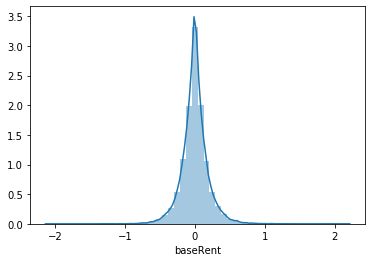

In [31]:
sns.distplot(test_y-y_pred)
plt.show()

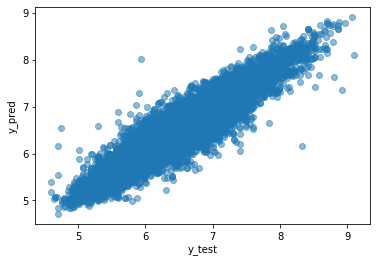

In [32]:
plt.scatter(test_y, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [33]:
actual_y=np.exp(test_y)
predicted_y=np.exp(y_pred)

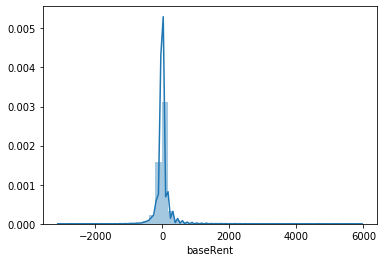

In [34]:
sns.distplot(actual_y-predicted_y)
plt.show()

In [35]:
from sklearn import metrics

In [36]:
print('MAE:', metrics.mean_absolute_error(actual_y, predicted_y))
print('MSE:', metrics.mean_squared_error(actual_y, predicted_y))
print('RMSE:', np.sqrt(metrics.mean_squared_error(actual_y, predicted_y)))

MAE: 97.3454098243807
MSE: 38349.16620287657
RMSE: 195.82943140109603


In [37]:
print('MAE:', metrics.mean_absolute_error(test_y, y_pred))
print('MSE:', metrics.mean_squared_error(test_y, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(test_y, y_pred)))

MAE: 0.1312548999855309
MSE: 0.03541753402473174
RMSE: 0.188195467598802


In [38]:
metrics.r2_score(test_y, y_pred)

0.9127969559276959

# STEP 6
Pickling the file

In [51]:
import pickle
# open a file, where you ant to store the data
file = open('apartment_rf.pkl', 'wb')

# dump information to that file
pickle.dump(reg_rf, file)

In [50]:
model = pickle.load(open('apartment_rf.pkl', 'rb'))

EOFError: Ran out of input

In [41]:
y_prediction = model.predict(X_test)

In [42]:
metrics.r2_score(test_y, y_prediction)

0.9079049357690587

In [43]:
import sklearn
import pickle

In [44]:
sklearn.__version__

'0.23.1'

In [45]:
print(pickle.format_version)

4.0
